# Comparing number of variants

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
files.upload()
print('done')

Saving Final data for Bidhan 4.4.23 _JB Tumor Cellularity Plot.xlsx to Final data for Bidhan 4.4.23 _JB Tumor Cellularity Plot.xlsx
done


In [ ]:
# df_1 = pd.read_excel('/content/exportMCOSP_070622-MGT110-2-NGS120_CAPTO-220707-000_IL_IL6346-P1_HKTYTDRX2__Variants.xlsx')
# df_2 = pd.read_excel('/content/exportMCOSP_070622-MGT110-2-NGS120_CAPTO-220707-000_IL_IL6346-P1_HKV7CDRX2__Variants.xlsx')
path = '/content/Final data for Bidhan 4.4.23 _JB Tumor Cellularity Plot.xlsx'
#path = '/content/Compiled Data.xlsx'
df_final = pd.read_excel(path, sheet_name='Cohort QCRC characteristics')
df_final = df_final[:141]
df_final = df_final[~((df_final['Qcyte # Variants'] == 0) & (df_final['Manual #variants'] == 0))]
df_final
# df_mayo = pd.read_excel('/content/MayoPanelA.xlsx')

,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%fat,%smooth muscle,%tumor epithelium within tissue,%stroma of tissue,%mucin of tissue,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,0.207213,7.723748,25.144656,51.769784,13.069075,6.116391,57.491775,33.177851,1.499643,17.053790
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,24.052758,4.118637,0.452434,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127
2,2.2,NaN,NaN,NaN,NaN,1,2.0,TP53,chr17:g.7578406C>T,NaN,...,24.052758,4.118637,0.452434,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,0.327021,2.753866,29.696764,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,0.327021,2.753866,29.696764,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,50.2,NaN,NaN,NaN,NaN,0,0.0,TP53,chr17:g.7577120C>T,0.970,...,0.027234,3.909917,53.041780,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565
134,51.1,51.0,0.0,3.0,2.0,1,0.0,APC,chr5:g.112175219A>T,0.951,...,0.000176,0.091980,57.287501,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654
135,51.2,NaN,NaN,NaN,NaN,1,0.0,TP53,chr17:g.7577538C>T,0.826,...,0.000176,0.091980,57.287501,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654
136,51.3,NaN,NaN,NaN,NaN,1,1.0,MSH6,chr2:g.48030639AC>A,0.043,...,0.000176,0.091980,57.287501,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654


In [ ]:
temp = df_final.dropna(subset = ['Tumor'])
samples = temp.dropna(subset = ['Variant seen 0=both, 1=Qcyte only, 2=manual only'])
samples

match_var = samples[samples['Qcyte # Variants'] == samples['Manual #variants']]
qcyte_var = samples[samples['Qcyte # Variants'] > samples['Manual #variants']]
manual_var = samples[samples['Qcyte # Variants'] < samples['Manual #variants']]
len(match_var), len(qcyte_var), len(manual_var)

(28, 15, 1)

Number of samples: 44

Number of samples where Qcyte and manual found the same number of variants: 28

Number of samples where Qcyte found more variants: 15

Number of samples where manual found more variants: 1

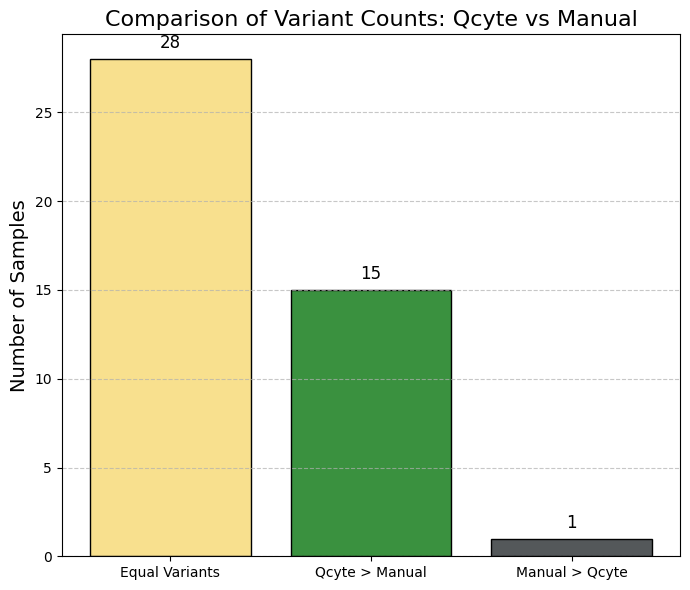

In [ ]:
import matplotlib.pyplot as plt

counts = [len(match_var), len(qcyte_var), len(manual_var)]
labels = ['Equal Variants', 'Qcyte > Manual', 'Manual > Qcyte']
colors = ['#F8E08E', '#3A913F', '#54585A']

fig, ax = plt.subplots(figsize=(7, 6))

bars = ax.bar(labels, counts, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

ax.set_ylabel('Number of Samples', fontsize=14)
ax.set_title('Comparison of Variant Counts: Qcyte vs Manual', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


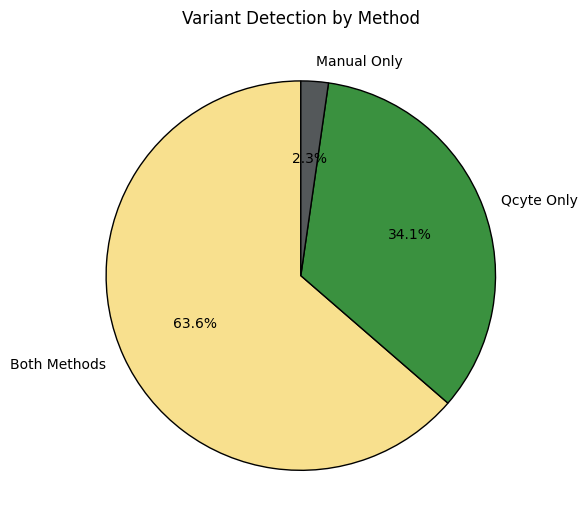

In [ ]:
import matplotlib.pyplot as plt

detection_counts = {
    'Both Methods': len(match_var),
    'Qcyte Only': len(qcyte_var),
    'Manual Only': len(manual_var)
}

plt.figure(figsize=(6, 6))
plt.pie(
    detection_counts.values(),
    labels=detection_counts.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#F8E08E', '#3A913F', '#54585A'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Variant Detection by Method')
plt.tight_layout()
plt.show()


# Comparing VAFs

In [ ]:
df_filtered = df_final.dropna(subset='Variant seen 0=both, 1=Qcyte only, 2=manual only')
df_both = df_filtered[df_filtered['Variant seen 0=both, 1=Qcyte only, 2=manual only'] == 0.0]
df_both

df_both['Qcyte VAF Increase'] = df_both['Qcyte AF'] - df_both['Manual VAF']
df_both

<ipython-input-9-13cceabd3bb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both['Qcyte VAF Increase'] = df_both['Qcyte AF'] - df_both['Manual VAF']


,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%smooth muscle,%tumor epithelium within tissue,%stroma of tissue,%mucin of tissue,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue,Qcyte VAF Increase
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,7.723748,25.144656,51.769784,13.069075,6.116391,57.491775,33.177851,1.499643,17.053790,0.125
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,4.118637,0.452434,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,0.126
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,2.753866,29.696764,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.103
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,2.753866,29.696764,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.153
8,5.1,5.0,0.0,5.0,3.0,1,0.0,TP53,chr17:g.7578263G>A,0.417,...,8.467036,53.765864,35.625245,0.588063,7.498721,19.412524,30.275471,0.829763,4.455741,-0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,50.1,50.0,0.0,2.0,2.0,0,0.0,APC,chr5:g.112175162C>T,0.934,...,3.909917,53.041780,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565,0.554
133,50.2,NaN,NaN,NaN,NaN,0,0.0,TP53,chr17:g.7577120C>T,0.970,...,3.909917,53.041780,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565,0.351
134,51.1,51.0,0.0,3.0,2.0,1,0.0,APC,chr5:g.112175219A>T,0.951,...,0.091980,57.287501,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.476
135,51.2,NaN,NaN,NaN,NaN,1,0.0,TP53,chr17:g.7577538C>T,0.826,...,0.091980,57.287501,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.299


In [ ]:
qcyte_inc_all = df_filtered

qcyte_inc_all[['Qcyte AF', 'Manual VAF']] = qcyte_inc_all[['Qcyte AF', 'Manual VAF']].fillna(0)
qcyte_inc_all['Qcyte VAF Increase'] = qcyte_inc_all['Qcyte AF'] - qcyte_inc_all['Manual VAF']

qcyte_inc_all

<ipython-input-10-6cfce5948ea3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qcyte_inc_all[['Qcyte AF', 'Manual VAF']] = qcyte_inc_all[['Qcyte AF', 'Manual VAF']].fillna(0)
<ipython-input-10-6cfce5948ea3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qcyte_inc_all['Qcyte VAF Increase'] = qcyte_inc_all['Qcyte AF'] - qcyte_inc_all['Manual VAF']


,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%smooth muscle,%tumor epithelium within tissue,%stroma of tissue,%mucin of tissue,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue,Qcyte VAF Increase
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,7.723748,25.144656,51.769784,13.069075,6.116391,57.491775,33.177851,1.499643,17.053790,0.125
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,4.118637,0.452434,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,0.126
2,2.2,NaN,NaN,NaN,NaN,1,2.0,TP53,chr17:g.7578406C>T,0.000,...,4.118637,0.452434,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,-0.076
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,2.753866,29.696764,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.103
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,2.753866,29.696764,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,50.2,NaN,NaN,NaN,NaN,0,0.0,TP53,chr17:g.7577120C>T,0.970,...,3.909917,53.041780,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565,0.351
134,51.1,51.0,0.0,3.0,2.0,1,0.0,APC,chr5:g.112175219A>T,0.951,...,0.091980,57.287501,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.476
135,51.2,NaN,NaN,NaN,NaN,1,0.0,TP53,chr17:g.7577538C>T,0.826,...,0.091980,57.287501,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.299
136,51.3,NaN,NaN,NaN,NaN,1,1.0,MSH6,chr2:g.48030639AC>A,0.043,...,0.091980,57.287501,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.043


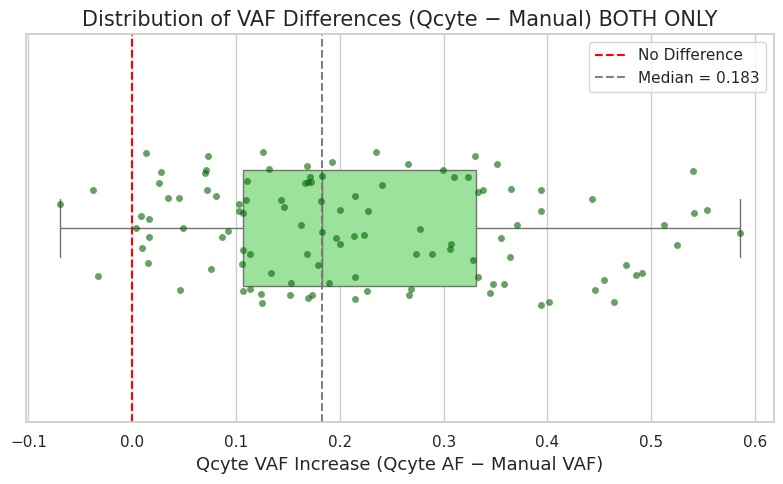

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.boxplot(x=df_both['Qcyte VAF Increase'], color='lightgreen', width=0.3)
sns.stripplot(x=df_both['Qcyte VAF Increase'], color='darkgreen', alpha=0.6, jitter=0.2)

plt.axvline(0, color='red', linestyle='--', label='No Difference')
median_vad = df_both['Qcyte VAF Increase'].median()
plt.axvline(median_vad, color='grey', linestyle='--', label=f'Median = {median_vad:.3f}')

plt.xlabel('Qcyte VAF Increase (Qcyte AF − Manual VAF)', fontsize=13)
plt.title('Distribution of VAF Differences (Qcyte − Manual) BOTH ONLY', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()


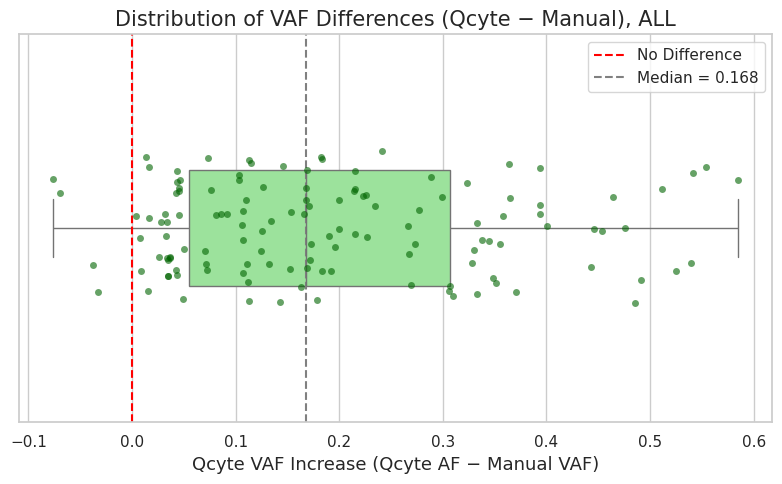

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.boxplot(x=qcyte_inc_all['Qcyte VAF Increase'], color='lightgreen', width=0.3)
sns.stripplot(x=qcyte_inc_all['Qcyte VAF Increase'], color='darkgreen', alpha=0.6, jitter=0.2)

plt.axvline(0, color='red', linestyle='--', label='No Difference')
median_vad = qcyte_inc_all['Qcyte VAF Increase'].median()
plt.axvline(median_vad, color='grey', linestyle='--', label=f'Median = {median_vad:.3f}')

plt.xlabel('Qcyte VAF Increase (Qcyte AF − Manual VAF)', fontsize=13)
plt.title('Distribution of VAF Differences (Qcyte − Manual), ALL', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

vaf_diffs = df_both['Qcyte VAF Increase'].dropna()

t_stat, p_value = stats.ttest_1samp(vaf_diffs, popmean=0)

print(f"T-statistic: {t_stat:.3f}")
print(f"Two-tailed p-value: {p_value:.3e}")

one_tailed_p = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)
print(f"One-tailed p-value (Qcyte > Manual): {one_tailed_p:.3e}")


T-statistic: 15.051
Two-tailed p-value: 1.797e-28
One-tailed p-value (Qcyte > Manual): 8.987e-29


In [ ]:
from scipy import stats

vaf_diffs = qcyte_inc_all['Qcyte VAF Increase'].dropna()

t_stat, p_value = stats.ttest_1samp(vaf_diffs, popmean=0)

print(f"T-statistic: {t_stat:.3f}")
print(f"Two-tailed p-value: {p_value:.3e}")

one_tailed_p = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)
print(f"One-tailed p-value (Qcyte > Manual): {one_tailed_p:.3e}")


T-statistic: 14.150
Two-tailed p-value: 5.098e-28
One-tailed p-value (Qcyte > Manual): 2.549e-28


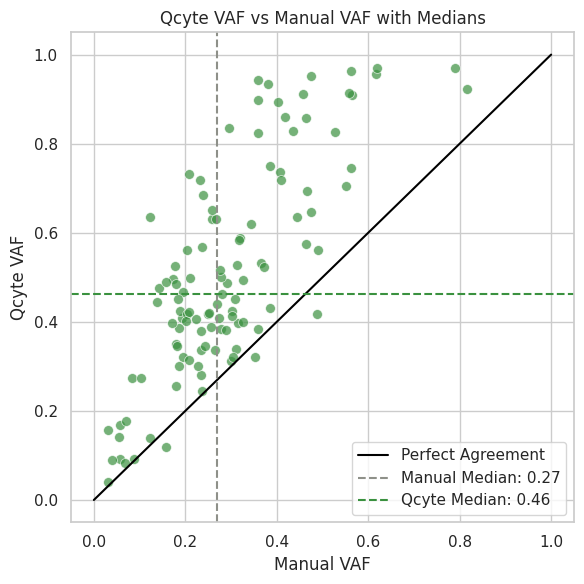

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

manual_median = df_both['Manual VAF'].median()
qcyte_median = df_both['Qcyte AF'].median()

plt.figure(figsize=(6, 6))
sns.scatterplot(
    x='Manual VAF',
    y='Qcyte AF',
    data=df_both,
    alpha=0.7,
    s=50,
    color='#3A913F'
)

plt.plot([0, 1], [0, 1], linestyle='-', color='black', label='Perfect Agreement')

plt.axvline(manual_median, color='#8E9089', linestyle='--', label=f'Manual Median: {manual_median:.2f}')
plt.axhline(qcyte_median, color='#3A913F', linestyle='--', label=f'Qcyte Median: {qcyte_median:.2f}')

plt.xlabel('Manual VAF')
plt.ylabel('Qcyte VAF')
plt.title('Qcyte VAF vs Manual VAF with Medians')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


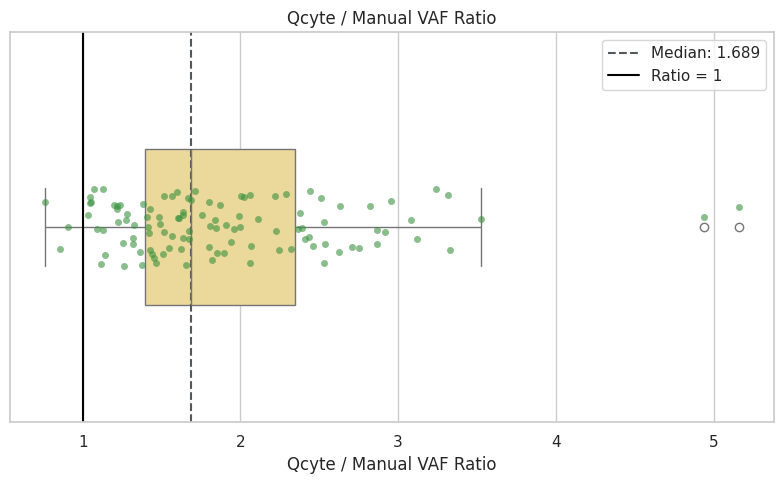

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

median_ratio = df_both['Qcyte/Manual VAF Ratio'].median()

plt.figure(figsize=(8, 5))

sns.boxplot(
    x='Qcyte/Manual VAF Ratio',
    data=df_both,
    color='#F8E08E',
    width=0.4
)

sns.stripplot(
    x='Qcyte/Manual VAF Ratio',
    data=df_both,
    color='#3A913F',
    size=5,
    alpha=0.6,
    jitter=True
)

plt.axvline(median_ratio, color='#54585A', linestyle='--', label=f'Median: {median_ratio:.3f}')

plt.axvline(1, color='black', linestyle='-', label='Ratio = 1')

plt.title('Qcyte / Manual VAF Ratio')
plt.xlabel('Qcyte / Manual VAF Ratio')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_1samp

ratios = df_both['Qcyte/Manual VAF Ratio'].dropna()

t_stat, p_val = ttest_1samp(ratios, 1)

print(f"One-sample t-test:\nt-statistic = {t_stat:.3f}, p-value = {p_val:.3g}")


One-sample t-test:
t-statistic = 12.643, p-value = 3.6e-23


# Germline Analysis

In [ ]:
df_both['Germline_Q'] = df_both['Qcyte AF'] > 0.5
df_both['Germline_Q'].value_counts()
df_both['Germline_M'] = df_both['Manual VAF'] > 0.5
df_both['Germline_M'].value_counts()

df_both

<ipython-input-18-fe8b60fb11de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both['Germline_Q'] = df_both['Qcyte AF'] > 0.5
<ipython-input-18-fe8b60fb11de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both['Germline_M'] = df_both['Manual VAF'] > 0.5


,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%stroma of tissue,%mucin of tissue,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue,Qcyte VAF Increase,Germline_Q,Germline_M
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,51.769784,13.069075,6.116391,57.491775,33.177851,1.499643,17.053790,0.125,False,False
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,0.126,False,False
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.103,False,False
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.153,True,True
8,5.1,5.0,0.0,5.0,3.0,1,0.0,TP53,chr17:g.7578263G>A,0.417,...,35.625245,0.588063,7.498721,19.412524,30.275471,0.829763,4.455741,-0.070,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,50.1,50.0,0.0,2.0,2.0,0,0.0,APC,chr5:g.112175162C>T,0.934,...,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565,0.554,True,False
133,50.2,NaN,NaN,NaN,NaN,0,0.0,TP53,chr17:g.7577120C>T,0.970,...,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565,0.351,True,True
134,51.1,51.0,0.0,3.0,2.0,1,0.0,APC,chr5:g.112175219A>T,0.951,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.476,True,False
135,51.2,NaN,NaN,NaN,NaN,1,0.0,TP53,chr17:g.7577538C>T,0.826,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.299,True,True


In [ ]:
qcyte_inc_all['Germline_Q'] = qcyte_inc_all['Qcyte AF'] > 0.5
qcyte_inc_all['Germline_Q'].value_counts()
qcyte_inc_all['Germline_M'] = qcyte_inc_all['Manual VAF'] > 0.5
qcyte_inc_all['Germline_M'].value_counts()

qcyte_inc_all

<ipython-input-19-3a4a2c892416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qcyte_inc_all['Germline_Q'] = qcyte_inc_all['Qcyte AF'] > 0.5
<ipython-input-19-3a4a2c892416>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qcyte_inc_all['Germline_M'] = qcyte_inc_all['Manual VAF'] > 0.5


,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%stroma of tissue,%mucin of tissue,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue,Qcyte VAF Increase,Germline_Q,Germline_M
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,51.769784,13.069075,6.116391,57.491775,33.177851,1.499643,17.053790,0.125,False,False
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,0.126,False,False
2,2.2,NaN,NaN,NaN,NaN,1,2.0,TP53,chr17:g.7578406C>T,0.000,...,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,-0.076,False,False
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.103,False,False
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.153,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,50.2,NaN,NaN,NaN,NaN,0,0.0,TP53,chr17:g.7577120C>T,0.970,...,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565,0.351,True,True
134,51.1,51.0,0.0,3.0,2.0,1,0.0,APC,chr5:g.112175219A>T,0.951,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.476,True,False
135,51.2,NaN,NaN,NaN,NaN,1,0.0,TP53,chr17:g.7577538C>T,0.826,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.299,True,True
136,51.3,NaN,NaN,NaN,NaN,1,1.0,MSH6,chr2:g.48030639AC>A,0.043,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.043,False,False


In [ ]:
import scipy.stats as stats
import numpy as np

data = np.array(df_both['Qcyte AF'])
data = data[~np.isnan(data)]

t_statistic, p_value = stats.ttest_1samp(data, popmean=0.5)

p_value_one_tailed = p_value / 2 if t_statistic > 0 else 1 - (p_value / 2)

print(f"T-statistic: {t_statistic:.3f}")
print(f"One-tailed p-value: {p_value_one_tailed:.3f}")


T-statistic: 0.436
One-tailed p-value: 0.332


In [ ]:
data = np.array(df_both['Manual VAF'])
data = data[~np.isnan(data)]

t_statistic, p_value = stats.ttest_1samp(data, popmean=0.5)

p_value_one_tailed = p_value / 2 if t_statistic > 0 else 1 - (p_value / 2)

print(f"T-statistic: {t_statistic:.3f}")
print(f"One-tailed p-value: {p_value_one_tailed:.3f}")

T-statistic: -14.338
One-tailed p-value: 1.000


In [ ]:
df_clean = df_both[['Qcyte AF', 'Manual VAF']].dropna()

mask = (df_clean['Qcyte AF'] > 0.5) & (df_clean['Manual VAF'] < 0.5)

count = mask.sum()

print(f"Number of rows: {count}")

filtered_rows = df_clean[mask]
print(filtered_rows)

Number of rows: 37
     Qcyte AF  Manual VAF
15      0.647       0.474
16      0.562       0.491
19      0.630       0.259
24      0.635       0.123
28      0.824       0.360
29      0.911       0.457
31      0.620       0.343
33      0.899       0.358
34      0.836       0.296
36      0.532       0.366
37      0.523       0.371
38      0.718       0.233
39      0.733       0.208
40      0.685       0.239
45      0.736       0.408
46      0.526       0.178
54      0.632       0.267
58      0.652       0.258
59      0.893       0.402
70      0.574       0.464
82      0.562       0.204
87      0.527       0.312
94      0.501       0.278
95      0.567       0.237
96      0.517       0.276
97      0.719       0.409
99      0.588       0.319
104     0.584       0.318
107     0.635       0.445
110     0.694       0.467
118     0.750       0.386
119     0.829       0.435
124     0.943       0.358
130     0.861       0.418
132     0.934       0.380
134     0.951       0.475
137     0.857      

In [ ]:
total_valid_rows = len(df_clean)

percentage = (count / total_valid_rows) * 100

print(f"Percentage of valid rows meeting condition: {percentage:.2f}%")

Percentage of valid rows meeting condition: 33.33%


In [ ]:
from scipy.stats import binomtest

result = binomtest(k=count, n=total_valid_rows, p=0.5, alternative='greater')

print(f"P-value: {result.pvalue:.5f}")
print(f"Proportion observed: {count}/{total_valid_rows} = {count/total_valid_rows:.3f}")


P-value: 0.99986
Proportion observed: 37/111 = 0.333


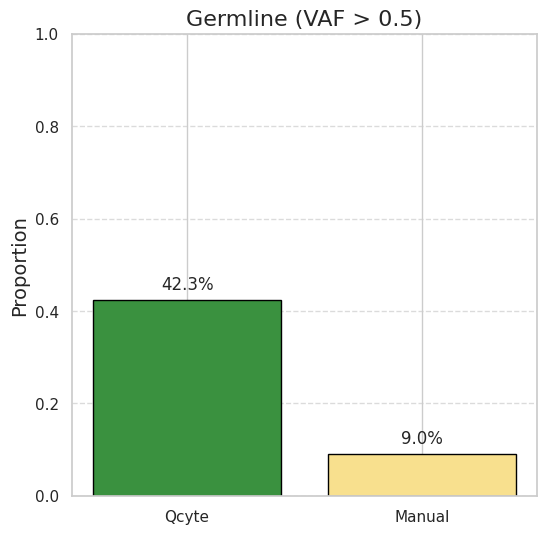

In [ ]:
import matplotlib.pyplot as plt

colA_above = ((df_both['Qcyte AF'] > 0.5) & (~df_both['Manual VAF'].isna())).sum()
colB_above = ((df_both['Manual VAF'] > 0.5) & (~df_both['Qcyte AF'].isna())).sum()

colA_valid = (~df_both['Qcyte AF'].isna()).sum()
colB_valid = (~df_both['Manual VAF'].isna()).sum()

propA = colA_above / colA_valid
propB = colB_above / colB_valid

fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    ['Qcyte', 'Manual'],
    [propA, propB],
    color=['#3A913F', '#F8E08E'],
    edgecolor='black'
)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height*100:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

ax.set_ylim(0, 1)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Germline (VAF > 0.5)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


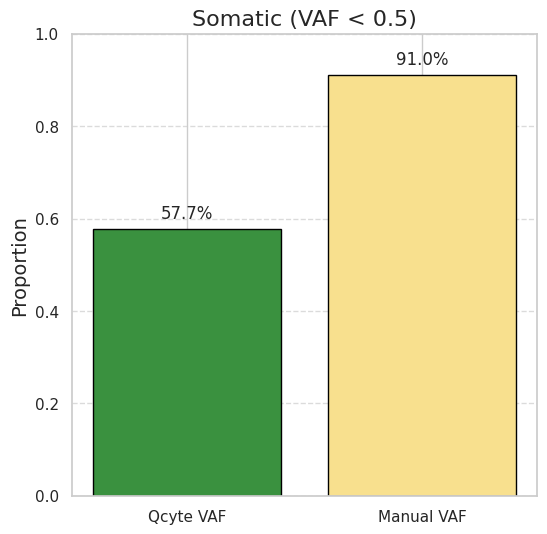

In [ ]:
import matplotlib.pyplot as plt

colA_below = (df_both['Qcyte AF'] < 0.5).sum()
colB_below = (df_both['Manual VAF'] < 0.5).sum()

colA_valid = df_both['Qcyte AF'].notna().sum()
colB_valid = df_both['Manual VAF'].notna().sum()

propA = colA_below / colA_valid
propB = colB_below / colB_valid

fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    ['Qcyte VAF', 'Manual VAF'],
    [propA, propB],
    color=['#3A913F', '#F8E08E'],
    edgecolor='black'
)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height*100:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

ax.set_ylim(0, 1)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Somatic (VAF < 0.5)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


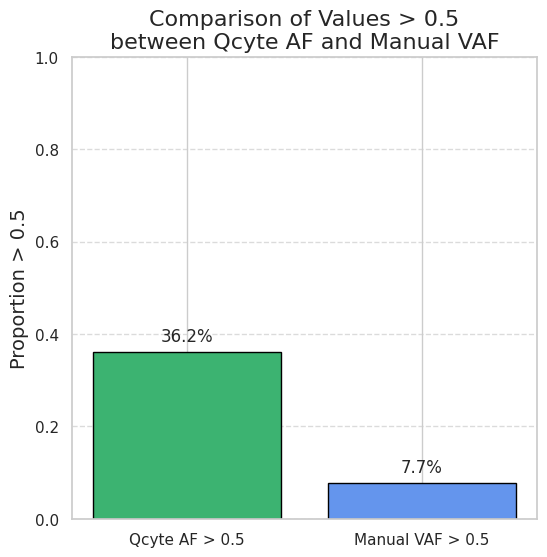

In [ ]:
import matplotlib.pyplot as plt

colA_above = ((qcyte_inc_all['Qcyte AF'] > 0.5) & (~qcyte_inc_all['Manual VAF'].isna())).sum()
colB_above = ((qcyte_inc_all['Manual VAF'] > 0.5) & (~qcyte_inc_all['Qcyte AF'].isna())).sum()

colA_valid = (~qcyte_inc_all['Qcyte AF'].isna()).sum()
colB_valid = (~qcyte_inc_all['Manual VAF'].isna()).sum()

propA = colA_above / colA_valid
propB = colB_above / colB_valid

fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    ['Qcyte AF > 0.5', 'Manual VAF > 0.5'],
    [propA, propB],
    color=['mediumseagreen', 'cornflowerblue'],
    edgecolor='black'
)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height*100:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

ax.set_ylim(0, 1)
ax.set_ylabel('Proportion > 0.5', fontsize=14)
ax.set_title('Comparison of Values > 0.5\nbetween Qcyte AF and Manual VAF', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


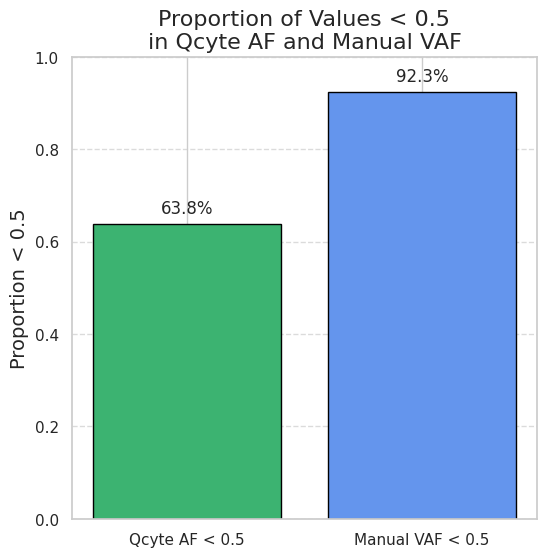

In [ ]:
import matplotlib.pyplot as plt

colA_below = (qcyte_inc_all['Qcyte AF'] < 0.5).sum()
colB_below = (qcyte_inc_all['Manual VAF'] < 0.5).sum()

colA_valid = qcyte_inc_all['Qcyte AF'].notna().sum()
colB_valid = qcyte_inc_all['Manual VAF'].notna().sum()

propA = colA_below / colA_valid
propB = colB_below / colB_valid

fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    ['Qcyte AF < 0.5', 'Manual VAF < 0.5'],
    [propA, propB],
    color=['mediumseagreen', 'cornflowerblue'],
    edgecolor='black'
)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height*100:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

ax.set_ylim(0, 1)
ax.set_ylabel('Proportion < 0.5', fontsize=14)
ax.set_title('Proportion of Values < 0.5\nin Qcyte AF and Manual VAF', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
manual_higher = df_both[
    (df_both['Manual VAF'] > df_both['Qcyte AF']) |  df_both['Qcyte AF'].isna() & df_both['Manual VAF'].notna()
]

manual_higher

qcyte_higher = df_both[
    (df_both['Qcyte AF'] > df_both['Manual VAF']) |  df_both['Qcyte AF'].notna() & df_both['Manual VAF'].isna()
]

qcyte_germ = qcyte_higher[(qcyte_higher['Germline_Q'] == True) & (qcyte_higher['Germline_M'] == False)]
qcyte_germ['Gene'].value_counts()



,count
Gene,
APC,11
TP53,11
KRAS,6
BRAF,4
PIK3CA,2
MSH6,1
PTPRD,1
BRCA2,1


<ipython-input-30-536cbea3b58f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gene_counts.index, y=gene_counts.values, palette='viridis')


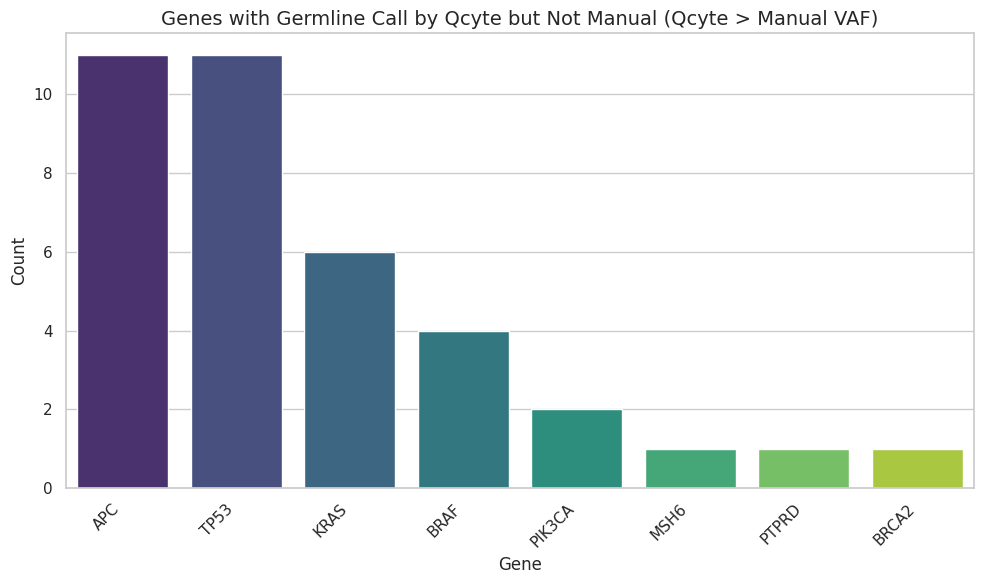

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

gene_counts = qcyte_germ['Gene'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=gene_counts.index, y=gene_counts.values, palette='viridis')

plt.title('Genes with Germline Call by Qcyte but Not Manual (Qcyte > Manual VAF)', fontsize=14)
plt.xlabel('Gene')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [ ]:
df_calls = df_both.dropna(subset=['Germline_Q', 'Germline_M'], how='all')

df_calls['Call_Qcyte'] = df_calls['Germline_Q'].map({True: 'Germline', False: 'Somatic'})
df_calls['Call_Manual'] = df_calls['Germline_M'].map({True: 'Germline', False: 'Somatic'})

df_melted = df_calls.melt(
    id_vars='Gene',
    value_vars=['Call_Qcyte', 'Call_Manual'],
    var_name='Method',
    value_name='Call'
)

df_melted['Method'] = df_melted['Method'].map({'Call_Qcyte': 'Qcyte', 'Call_Manual': 'Manual'})

df_melted['Method_Call'] = df_melted['Method'] + ' - ' + df_melted['Call']

summary = df_melted.groupby(['Method', 'Call']).size().unstack(fill_value=0)

counts = df_melted.groupby(['Gene', 'Method', 'Call']).size().reset_index(name='Count')

pivoted = counts.pivot_table(index=['Gene', 'Method'], columns='Call', values='Count', fill_value=0).reset_index()

In [ ]:
df_calls

,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue,Qcyte VAF Increase,Germline_Q,Germline_M,Call_Qcyte,Call_Manual
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,6.116391,57.491775,33.177851,1.499643,17.053790,0.125,False,False,Somatic,Somatic
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,0.739673,87.083758,7.499392,0.229925,30.594127,0.126,False,False,Somatic,Somatic
2,2.2,NaN,NaN,NaN,NaN,1,2.0,TP53,chr17:g.7578406C>T,NaN,...,0.739673,87.083758,7.499392,0.229925,30.594127,-0.076,NaN,False,NaN,Somatic
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,8.055224,84.246025,38.528831,6.463002,11.533125,0.103,False,False,Somatic,Somatic
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,8.055224,84.246025,38.528831,6.463002,11.533125,0.153,True,True,Germline,Germline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,50.2,NaN,NaN,NaN,NaN,0,0.0,TP53,chr17:g.7577120C>T,0.970,...,5.435370,19.674788,28.086836,7.026708,4.083565,0.351,True,True,Germline,Germline
134,51.1,51.0,0.0,3.0,2.0,1,0.0,APC,chr5:g.112175219A>T,0.951,...,0.808236,65.967383,30.623516,3.978836,4.833654,0.476,True,False,Germline,Somatic
135,51.2,NaN,NaN,NaN,NaN,1,0.0,TP53,chr17:g.7577538C>T,0.826,...,0.808236,65.967383,30.623516,3.978836,4.833654,0.299,True,True,Germline,Germline
136,51.3,NaN,NaN,NaN,NaN,1,1.0,MSH6,chr2:g.48030639AC>A,0.043,...,0.808236,65.967383,30.623516,3.978836,4.833654,0.043,False,NaN,Somatic,NaN


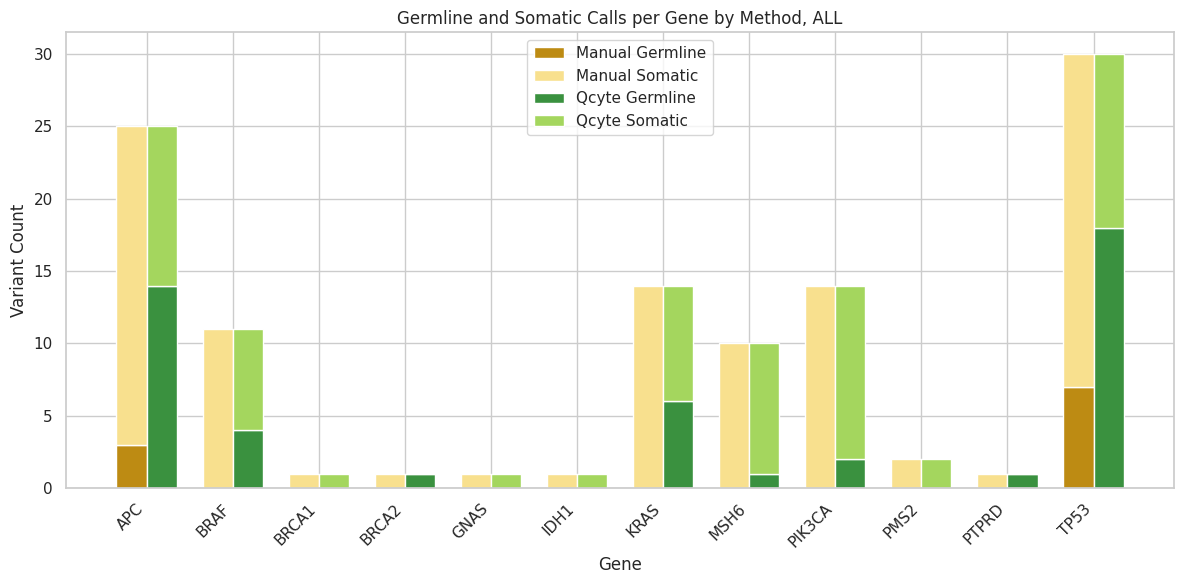

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pivoted.sort_values(by='Gene', inplace=True)

genes = pivoted['Gene'].unique()
methods = ['Manual', 'Qcyte']
x = np.arange(len(genes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

colors = {
    'Manual Germline': '#BD8B13',
    'Manual Somatic': '#F8E08E',
    'Qcyte Germline': '#3A913F',
    'Qcyte Somatic': '#A4D65E'
}

for i, method in enumerate(methods):
    subset = pivoted[pivoted['Method'] == method]
    germline = subset['Germline']
    somatic = subset['Somatic']

    germline_color = colors[f'{method} Germline']
    somatic_color = colors[f'{method} Somatic']

    bar1 = ax.bar(x + i*width, germline, width, label=f'{method} Germline', color=germline_color)
    bar2 = ax.bar(x + i*width, somatic, width, bottom=germline, label=f'{method} Somatic', color=somatic_color)

ax.set_xlabel('Gene')
ax.set_ylabel('Variant Count')
ax.set_title('Germline and Somatic Calls per Gene by Method, ALL')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(genes, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

qcyte_inc_all[['Qcyte AF', 'Manual VAF']] = qcyte_inc_all[['Qcyte AF', 'Manual VAF']].replace(0, np.nan)

qcyte_inc_all.loc[qcyte_inc_all['Qcyte AF'].isna(), 'Germline_Q'] = np.nan

qcyte_inc_all.loc[qcyte_inc_all['Manual VAF'].isna(), 'Germline_M'] = np.nan



df_calls = qcyte_inc_all.dropna(subset=['Germline_Q', 'Germline_M'], how='all')

df_calls['Call_Qcyte'] = df_calls['Germline_Q'].map({True: 'Germline', False: 'Somatic'})
df_calls['Call_Manual'] = df_calls['Germline_M'].map({True: 'Germline', False: 'Somatic'})

df_melted = df_calls.melt(
    id_vars='Gene',
    value_vars=['Call_Qcyte', 'Call_Manual'],
    var_name='Method',
    value_name='Call'
)

df_melted = df_melted.dropna(subset=['Call'])


df_melted['Method'] = df_melted['Method'].map({'Call_Qcyte': 'Qcyte', 'Call_Manual': 'Manual'})

df_melted['Method_Call'] = df_melted['Method'] + ' - ' + df_melted['Call']

summary = df_melted.groupby(['Method', 'Call']).size().unstack(fill_value=0)

counts = df_melted.groupby(['Gene', 'Method', 'Call']).size().reset_index(name='Count')

pivoted = counts.pivot_table(index=['Gene', 'Method'], columns='Call', values='Count', fill_value=0).reset_index()

counts = df_melted.groupby(['Gene', 'Method', 'Call']).size().reset_index(name='Count')

from itertools import product

all_genes = df_melted['Gene'].unique()
all_methods = ['Manual', 'Qcyte']
all_calls = ['Germline', 'Somatic']

full_index = pd.DataFrame(list(product(all_genes, all_methods, all_calls)), columns=['Gene', 'Method', 'Call'])

counts_full = full_index.merge(counts, on=['Gene', 'Method', 'Call'], how='left').fillna(0)

pivoted = counts_full.pivot_table(index=['Gene', 'Method'], columns='Call', values='Count', fill_value=0).reset_index()

pivoted['Total'] = pivoted[['Germline', 'Somatic']].sum(axis=1)
gene_totals = pivoted.groupby('Gene')['Total'].sum()
valid_genes = gene_totals[gene_totals > 0].index
pivoted = pivoted[pivoted['Gene'].isin(valid_genes)]

qcyte_inc_all

<ipython-input-33-33a93f2bc9fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qcyte_inc_all[['Qcyte AF', 'Manual VAF']] = qcyte_inc_all[['Qcyte AF', 'Manual VAF']].replace(0, np.nan)
<ipython-input-33-33a93f2bc9fb>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  qcyte_inc_all.loc[qcyte_inc_all['Qcyte AF'].isna(), 'Germline_Q'] = np.nan
<ipython-input-33-33a93f2bc9fb>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compati

,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%stroma of tissue,%mucin of tissue,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue,Qcyte VAF Increase,Germline_Q,Germline_M
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,51.769784,13.069075,6.116391,57.491775,33.177851,1.499643,17.053790,0.125,False,False
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,0.126,False,False
2,2.2,NaN,NaN,NaN,NaN,1,2.0,TP53,chr17:g.7578406C>T,NaN,...,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,-0.076,NaN,False
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.103,False,False
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.153,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,50.2,NaN,NaN,NaN,NaN,0,0.0,TP53,chr17:g.7577120C>T,0.970,...,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565,0.351,True,True
134,51.1,51.0,0.0,3.0,2.0,1,0.0,APC,chr5:g.112175219A>T,0.951,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.476,True,False
135,51.2,NaN,NaN,NaN,NaN,1,0.0,TP53,chr17:g.7577538C>T,0.826,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.299,True,True
136,51.3,NaN,NaN,NaN,NaN,1,1.0,MSH6,chr2:g.48030639AC>A,0.043,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.043,False,NaN


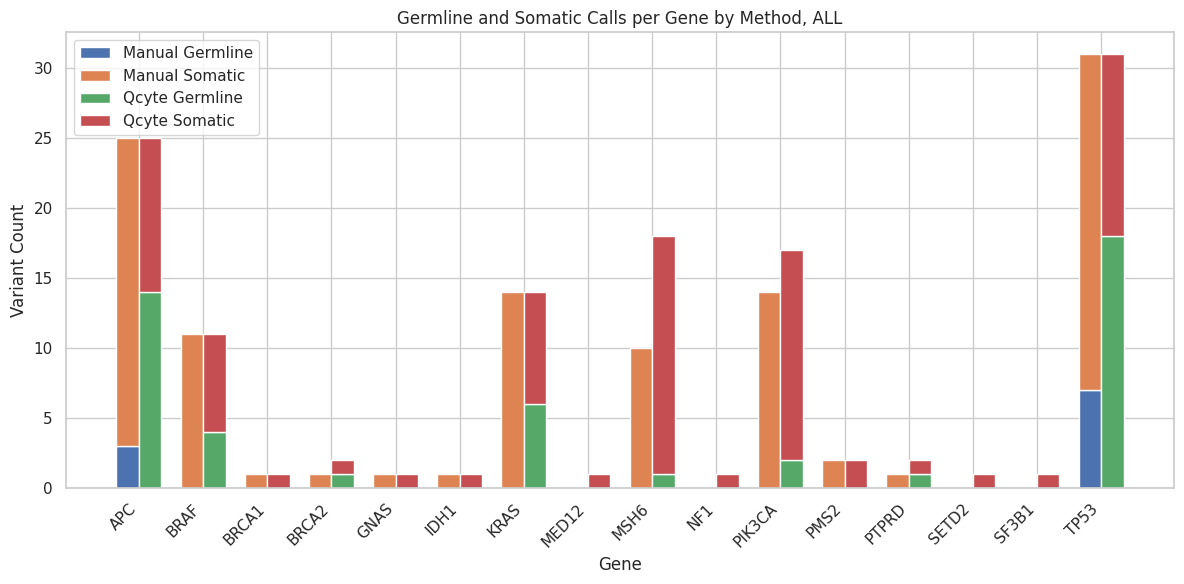

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pivoted.sort_values(by='Gene', inplace=True)

genes = pivoted['Gene'].unique()
methods = ['Manual', 'Qcyte']
x = np.arange(len(genes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

for i, method in enumerate(methods):
    subset = pivoted[pivoted['Method'] == method]
    germline = subset['Germline']
    somatic = subset['Somatic']
    bar = ax.bar(x + i*width, germline, width, label=f'{method} Germline')
    ax.bar(x + i*width, somatic, width, bottom=germline, label=f'{method} Somatic')

ax.set_xlabel('Gene')
ax.set_ylabel('Variant Count')
ax.set_title('Germline and Somatic Calls per Gene by Method, ALL')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(genes, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
qcyte_inc_all

,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%stroma of tissue,%mucin of tissue,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue,Qcyte VAF Increase,Germline_Q,Germline_M
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,51.769784,13.069075,6.116391,57.491775,33.177851,1.499643,17.053790,0.125,False,False
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,0.126,False,False
2,2.2,NaN,NaN,NaN,NaN,1,2.0,TP53,chr17:g.7578406C>T,NaN,...,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127,-0.076,NaN,False
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.103,False,False
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125,0.153,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,50.2,NaN,NaN,NaN,NaN,0,0.0,TP53,chr17:g.7577120C>T,0.970,...,39.378383,0.156948,5.435370,19.674788,28.086836,7.026708,4.083565,0.351,True,True
134,51.1,51.0,0.0,3.0,2.0,1,0.0,APC,chr5:g.112175219A>T,0.951,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.476,True,False
135,51.2,NaN,NaN,NaN,NaN,1,0.0,TP53,chr17:g.7577538C>T,0.826,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.299,True,True
136,51.3,NaN,NaN,NaN,NaN,1,1.0,MSH6,chr2:g.48030639AC>A,0.043,...,39.541948,1.036283,0.808236,65.967383,30.623516,3.978836,4.833654,0.043,False,NaN


In [ ]:
import pandas as pd
import numpy as np

df_final[['Qcyte AF', 'Manual VAF']] = df_final[['Qcyte AF', 'Manual VAF']].replace(0, np.nan)

df_final['Main Sample'] = df_final['Tumor'].astype(str).str.split('.').str[0]

qcyte_only = df_final[
    df_final['Qcyte AF'].notna() & df_final['Manual VAF'].isna()
]

grouped = qcyte_only.groupby('Main Sample')['Tumor_alterations'].apply(list).reset_index()

expanded = grouped['Tumor_alterations'].apply(pd.Series)
expanded.columns = [f'Tumor_alterations {i+1}' for i in expanded.columns]

result = pd.concat([grouped['Main Sample'], expanded], axis=1)

result.rename(columns={'Main Sample': 'Tumor'}, inplace=True)

result.head()


print(qcyte_only.shape)
print(qcyte_only[['Tumor', 'Tumor_alterations']])



(18, 26)
     Tumor  Tumor_alterations
5      NaN                3.3
6      NaN                3.4
11     NaN                5.4
12     NaN                5.5
18     NaN                8.4
21     NaN                9.3
32     NaN               12.5
41     NaN               16.4
55     NaN               22.3
63     NaN               24.5
88     NaN               30.6
105    NaN               37.4
108    NaN               38.3
114    NaN               41.3
115    NaN               41.4
120    NaN               43.3
123    NaN               44.3
136    NaN               51.3


In [ ]:
import pandas as pd
import numpy as np

df_final[['Qcyte AF', 'Manual VAF']] = df_final[['Qcyte AF', 'Manual VAF']].replace(0, np.nan)

qcyte_only = df_final[
    df_final['Qcyte AF'].notna() & df_final['Manual VAF'].isna()
]

qcyte_only_table = qcyte_only[['Tumor', 'Gene']].copy()
qcyte_only_table.rename(columns={'Tumor': 'Sample', 'Gene': 'Qcyte-only Variant'}, inplace=True)

qcyte_only_table.head()


,Sample,Qcyte-only Variant
5,NaN,TP53
6,NaN,SF3B1
11,NaN,PTPRD
12,NaN,MSH6
18,NaN,PIK3CA
